In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import datetime as dt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (36,16)

Fonte https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

Obtendo dados através da API do BACEN

In [2]:
def consulta_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df

In [3]:
ipca = consulta_bc(433) # índice nacional de preços ao consumidor-amplo IBGE
ipca_12 = consulta_bc(13522) # índice nacional de preços ao consumidor - amplo (IPCA) - em 12 meses IBGE
selic = consulta_bc(1178) # Taxa de juros - Selic anualizada base 252
selic_meta = consulta_bc(432) # Taxa de juros = Meta Selic definida pelo Copom
cdi = consulta_bc(4389) # Taxa de juros - CDI anualizada base 252
cdi_dia = consulta_bc(12) # Taxa de juros - CDI % a.d.
cdi_acum_mes = consulta_bc(4391) # Taxa de juros - CDI acumulada no mês % a.m.
cdi_acum_mes_anu = consulta_bc(4392) # Taxa de juros - CDI acumulada no mês anualizada base 252

In [4]:
selic[selic.index == '2000-07-03']

,valor
data,
2000-07-03,17.26


In [5]:
selic[selic.index == '2000-07-04']

,valor
data,
2000-07-04,17.22


In [6]:
selic['Fator Acumulação'] = [(1+valor/100)**(1/252) for valor in selic['valor'].values]

In [7]:
selic[selic.index == '2000-07-03']

,valor,Fator Acumulação
data,,
2000-07-03,17.26,1.000632


In [8]:
selic

,valor,Fator Acumulação
data,,
1986-06-04,17.80,1.000650
1986-06-05,18.50,1.000674
1986-06-06,18.31,1.000667
1986-06-09,18.76,1.000683
1986-06-10,18.40,1.000670
...,...,...
2022-08-16,13.65,1.000508
2022-08-17,13.65,1.000508
2022-08-18,13.65,1.000508


In [9]:
for i in range(len(selic)):
    if selic.index[i] == dt.datetime(2000, 7, 3):
        selic['VNA'][i] = 1000#selic['VNA'][i-1]*selic['Fator Acumulação'][i]
        print('deveria ser 1000')
    elif selic.index[i] > dt.datetime(2000, 7, 3):
        selic['VNA'].iloc[i] = selic['VNA'].iloc[i-1]*selic['Fator Acumulação'].iloc[i-1]
        #selic['VNA'][i] = float(selic['VNA'][i-1])*float(selic['Fator Acumulação'][i])
        #print('deveria ser acima de 1000')


KeyError: 'VNA'

In [ ]:
selic

,valor,Fator Acumulação,VNA
data,,,
1986-06-04,17.80,1.000650,1.000000
1986-06-05,18.50,1.000674,1.000000
1986-06-06,18.31,1.000667,1.000000
1986-06-09,18.76,1.000683,1.000000
1986-06-10,18.40,1.000670,1.000000
...,...,...,...
2022-07-20,13.15,1.000490,11921.086325
2022-07-21,13.15,1.000490,11926.932127
2022-07-22,13.15,1.000490,11932.780795


In [ ]:
selic[selic.index == '2018-08-20']

,valor,Fator Acumulação,VNA
data,,,
2018-08-20,6.4,1.000246,9663.96082


In [ ]:
selic['VNA'] = len(selic)*[1]
list_a = [selic['VNA'][i - 1]*selic['Fator Acumulação'][i - 1] for i in range(len(selic))]

In [ ]:
(1 + 17.26/100)**(1/252)

1.0006320389602328

In [ ]:
cdi

,valor
data,
1986-03-06,18.72
1986-03-10,18.99
1986-03-12,18.51
1986-03-14,17.67
1986-03-17,18.75
...,...
2022-07-20,13.15
2022-07-21,13.15
2022-07-22,13.15


In [ ]:
tx_dia = (1+cdi['valor'][-1]/100)**(1/252) - 1
round(tx_dia*100,6)

0.049037

In [ ]:
list_didia = []
for i in range(len(cdi)):
    list_didia.append(100*((1+cdi['valor'][i]/100)**(1/252) - 1))
new_df = cdi.copy(deep=True)
new_df['tx_dia'] = list_didia

In [ ]:
new_df

,valor,tx_dia
data,,
1986-03-06,18.72,0.068117
1986-03-10,18.99,0.069020
1986-03-12,18.51,0.067414
1986-03-14,17.67,0.064590
1986-03-17,18.75,0.068218
...,...,...
2022-07-20,13.15,0.049037
2022-07-21,13.15,0.049037
2022-07-22,13.15,0.049037


In [ ]:
cdi_dia

,valor
data,
1986-03-06,0.068111
1986-03-10,0.069028
1986-03-12,0.067417
1986-03-14,0.064584
1986-03-17,0.068222
...,...
2022-07-20,0.049037
2022-07-21,0.049037
2022-07-22,0.049037


In [ ]:
selic_meta

,valor
data,
1999-03-05,45.00
1999-03-06,45.00
1999-03-07,45.00
1999-03-08,45.00
1999-03-09,45.00
...,...
2022-07-30,13.25
2022-07-31,13.25
2022-08-01,13.25


In [ ]:
selic_meta[-100:]

,valor
data,
2022-04-26,11.75
2022-04-27,11.75
2022-04-28,11.75
2022-04-29,11.75
2022-04-30,11.75
...,...
2022-07-30,13.25
2022-07-31,13.25
2022-08-01,13.25


<AxesSubplot:xlabel='data'>

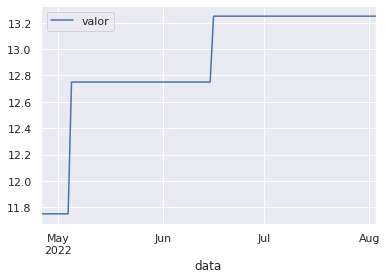

In [ ]:
selic_meta[-100:].plot()

In [ ]:
ipca[-15:]

,valor
data,
2021-04-01,0.31
2021-05-01,0.83
2021-06-01,0.53
2021-07-01,0.96
2021-08-01,0.87
2021-09-01,1.16
2021-10-01,1.25
2021-11-01,0.95
2021-12-01,0.73


<AxesSubplot:xlabel='data'>

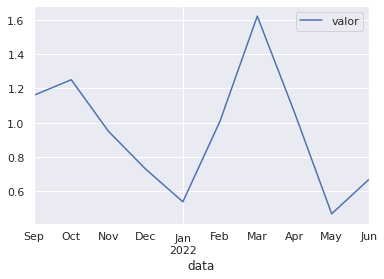

In [ ]:
ipca[-10:].plot()

In [ ]:
ipca_12

,valor
data,
1980-12-01,99.25
1981-01-01,99.67
1981-02-01,103.07
1981-03-01,101.03
1981-04-01,103.27
...,...
2022-02-01,10.54
2022-03-01,11.30
2022-04-01,12.13


In [ ]:
import sidrapy

In [ ]:
data = sidrapy.get_table(table_code="1737", territorial_level="1", ibge_territorial_code="all", period="last 200")
data2 = data[['V', 'D2N', 'D3N']]
data2 = data2[data2['D3N']==data['D3N'][1]]
data2

,V,D2N,D3N
1,2526.3100000000000,novembro 2005,IPCA - Número-índice (base: dezembro de 1993 =...
7,2535.4000000000000,dezembro 2005,IPCA - Número-índice (base: dezembro de 1993 =...
13,2550.3600000000000,janeiro 2006,IPCA - Número-índice (base: dezembro de 1993 =...
19,2560.8200000000000,fevereiro 2006,IPCA - Número-índice (base: dezembro de 1993 =...
25,2571.8300000000000,março 2006,IPCA - Número-índice (base: dezembro de 1993 =...
...,...,...,...
1171,6215.2400000000000,fevereiro 2022,IPCA - Número-índice (base: dezembro de 1993 =...
1177,6315.9300000000000,março 2022,IPCA - Número-índice (base: dezembro de 1993 =...
1183,6382.8800000000000,abril 2022,IPCA - Número-índice (base: dezembro de 1993 =...
1189,6412.8800000000000,maio 2022,IPCA - Número-índice (base: dezembro de 1993 =...


In [ ]:
sidrapy.get_table()

In [ ]:
def get_ipca():
    new_dates = []
    data = sidrapy.get_table(table_code="1737", territorial_level="1", ibge_territorial_code="all", period="last 500")
    data2 = data[['V', 'D2N', 'D3N']]
    ipca = data2[data2['D3N']==data['D3N'][1]]
    list_names = ['janeiro ', 'fevereiro ', 'março ', 'abril ', 'maio ', 'junho ', 'julho ', 'agosto ', 'setembro ', 'outubro ', 'novembro ', 'dezembro ']
    list_dates = ['01-01-', '01-02-', '01-03-', '01-04-', '01-05-', '01-06-', '01-07-', '01-08-', '01-09-', '01-10-', '01-11-', '01-12-']
    for i in range(len(ipca['D2N'].values)):
        string_temp = ipca['D2N'].values[i]
        for j in range(len(list_names)):
            if list_names[j] in string_temp:
                string_temp = string_temp.replace(list_names[j], list_dates[j])
                new_dates.append(string_temp)
    ipca['D2N'] = pd.to_datetime(new_dates, format='%d-%m-%Y')
    ipca = ipca[['D2N', 'V']]
    ipca = ipca.rename(columns={'D2N':'Date', 'V':'Numero Indice'})
    return ipca

In [ ]:
df_ipca = get_ipca()

/tmp/ipykernel_325530/2975685601.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipca['D2N'] = pd.to_datetime(new_dates, format='%d-%m-%Y')


In [ ]:
df_ipca = df_ipca.reset_index(drop=True)
df_ipca

,Date,Numero Indice
0,1980-11-01,0.0000000142378
1,1980-12-01,0.0000000151795
2,1981-01-01,0.0000000162174
3,1981-02-01,0.0000000172555
4,1981-03-01,0.0000000181134
...,...,...
495,2022-02-01,6215.2400000000000
496,2022-03-01,6315.9300000000000
497,2022-04-01,6382.8800000000000
498,2022-05-01,6412.8800000000000


In [ ]:
for i in range(len(df_ipca)):
    #print(df_ipca['Numero Indice'][i])
    if float(df_ipca['Numero Indice'][i]) == 100.0:
        print(df_ipca['Date'][i])

1993-12-01 00:00:00


In [ ]:
df_ipca[df_ipca['Date']== '2000-4-01']['Numero Indice'].iloc[0] # 17/5/200 VNA = 1.000

'1610.7500000000000'

In [ ]:
VNA = 1000*float(df_ipca['Numero Indice'].iloc[-2])/float(df_ipca[df_ipca['Date']== '2000-4-01']['Numero Indice'].iloc[0])

In [ ]:
VNA

3981.3006363495265

In [ ]:
list_return_ipca = []
df_temp = pd.DataFrame()
initial_date = dt.datetime(2020,1,1)
final_date = dt.datetime(2022,8,1)
df_temp = df_ipca[(df_ipca['Date']>= initial_date) & (df_ipca['Date'] <= final_date)]

In [ ]:
df_temp

,Date,Numero Indice
1021,2020-01-01,5331.4200000000000
1027,2020-02-01,5344.7500000000000
1033,2020-03-01,5348.4900000000000
1039,2020-04-01,5331.9100000000000
1045,2020-05-01,5311.6500000000000
1051,2020-06-01,5325.4600000000000
1057,2020-07-01,5344.6300000000000
1063,2020-08-01,5357.4600000000000
1069,2020-09-01,5391.7500000000000
1075,2020-10-01,5438.1200000000000


In [ ]:
df_temp['Numero Indice'] = [float(ni) for ni in df_temp['Numero Indice'].values]

/tmp/ipykernel_325530/3552396763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Numero Indice'] = [float(ni) for ni in df_temp['Numero Indice'].values]


In [ ]:
df_temp['VM'] = round(100*df_temp['Numero Indice'].pct_change(),2)

/tmp/ipykernel_325530/2259256649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['VM'] = round(100*df_temp['Numero Indice'].pct_change(),2)


In [ ]:
df_temp

,Date,Numero Indice,VM
1021,2020-01-01,5331.42,NaN
1027,2020-02-01,5344.75,0.25
1033,2020-03-01,5348.49,0.07
1039,2020-04-01,5331.91,-0.31
1045,2020-05-01,5311.65,-0.38
1051,2020-06-01,5325.46,0.26
1057,2020-07-01,5344.63,0.36
1063,2020-08-01,5357.46,0.24
1069,2020-09-01,5391.75,0.64
1075,2020-10-01,5438.12,0.86


In [ ]:
ipca.tail(20)

,valor
data,
2020-11-01,0.89
2020-12-01,1.35
2021-01-01,0.25
2021-02-01,0.86
2021-03-01,0.93
2021-04-01,0.31
2021-05-01,0.83
2021-06-01,0.53
2021-07-01,0.96
